## Практикум по Pandas

In [1]:
import pandas as pd
import numpy as np

In [ ]:
# метод aggregate появился в версии Pandas 0.20.0
# если выдается ошибка AttributeError: 'DataFrame' object has no attribute 'aggregate', то надо обновить Pandas:
# conda update pandas
# или conda update conda

In [ ]:
# если вы запускаете notebook в другом ядре (например, питон 3.6 при основной версии питона на компьютере 2.7), то
# обновляем версию Pandas для этого ядра:
# смотрим какие ядра установлены: conda info --envs
# активируем нужное ядро: source activate python3 (в Windows команда без source)
# обновляем Pandas: conda update pandas

In [2]:
# проверяем версию Pandas
pd.__version__

'2.0.3'

In [3]:
# ! вначале запускает консоль windows в ячейке
! dir

 ’®¬ ў гбва®©бвўҐ C Ё¬ҐҐв ¬ҐвЄг win10
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : 4A69-A685

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ C:\Users\master\VSCode\Netologic\Modul_02_Pandas

23.05.2024  13:57    <DIR>          .
23.05.2024  13:57    <DIR>          ..
22.05.2024  14:24    <DIR>          .ipynb_checkpoints
22.05.2024  14:20    <DIR>          Homework
23.05.2024  13:57            36я039 Pandas.ipynb
16.05.2024  21:32            61я194 train.csv
               2 д ©«®ў         97я233 Ў ©в
               4 Ї Ї®Є  88я859я258я880 Ў ©в бў®Ў®¤­®


### Создание DataFrame из листов и словарей

In [ ]:
dataList = [
    { 'date': '2017-07-01', 'value': 100 },
    { 'date': '2017-07-02', 'value': 200 },
    { 'date': '2017-07-03', 'value': 300 },
    { 'date': '2017-07-04', 'value': 400 },
    { 'date': '2017-07-05', 'value': 500 },
]

In [ ]:
pd.DataFrame( dataList )

In [ ]:
# то же самое, но в другом виде
# задаем столбцы

dataDict = {
    'date': [ '2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04', '2017-07-05' ],
    'value': [ 100, 200, 300, 400, 500 ]
}

pd.DataFrame.from_dict( dataDict )

In [ ]:
# для сохранения порядка следования элементов можем использовать лист вместо словаря

dataDict = [
    ( 'date', [ '2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04', '2017-07-05' ] ),
    ( 'value', [ 100, 200, 300, 400, 500 ] )
]

pd.DataFrame.from_items( dataDict )

In [ ]:
# лист кортежей с указанием заголовков
dataLists = [
    ('2017-07-01', 100),
    ('2017-07-02', 200),
    ('2017-07-03', 300),
    ('2017-07-04', 400),
    ('2017-07-05', 500),
]

headers = [ 'date', 'value' ]
pd.DataFrame.from_records( dataLists, columns = headers )

### Создание Series

In [ ]:
# можно использовать Numpy для генерации данных
dataNP = np.random.rand( 3 )

In [ ]:
dataNP

In [ ]:
pd.Series( dataNP, index = [ 'first', 'second', 'third' ] )

### Импорт данных для DataFrame из файлов

In [4]:
data = pd.read_csv('train.csv', delimiter=',')

In [ ]:
data.tail()

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv
# указываем разделитель столбцов в файле
# заголовок у файла есть, но можно задать свои названия (удобно, если изначально они на русском)
# выводим первые 10 строк

data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head(10)

In [5]:
data.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# основная информация о нашем DataFrame
# хорошо показывает в каких данных много пропусков
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html

data.info()

Столбцы SibSp и Parch (наличие родственников среди пассажиров) распознаны как целое число. Если недо это исправить, то используем dtype:

In [6]:
data = pd.read_csv( 'train.csv', delimiter = ',', dtype = {'SibSp': str, 'Parch': str, 'Pclass': str, } )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    object 
 7   Parch        891 non-null    object 
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 83.7+ KB


In [7]:
# статистика DataFrame
# вывод зависит от типа данных
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

data.describe()


,PassengerId,Survived,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,29.699118,32.204208
std,257.353842,0.486592,14.526497,49.693429
min,1.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,20.125000,7.910400
50%,446.000000,0.000000,28.000000,14.454200
75%,668.500000,1.000000,38.000000,31.000000
max,891.000000,1.000000,80.000000,512.329200


### Распределение значений столбца

In [8]:
type(data['Pclass'])

pandas.core.series.Series

In [9]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

### Гистограмма распределения

In [16]:
# рисуем в браузере
%matplotlib inline
# data['Age'].value_counts()

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

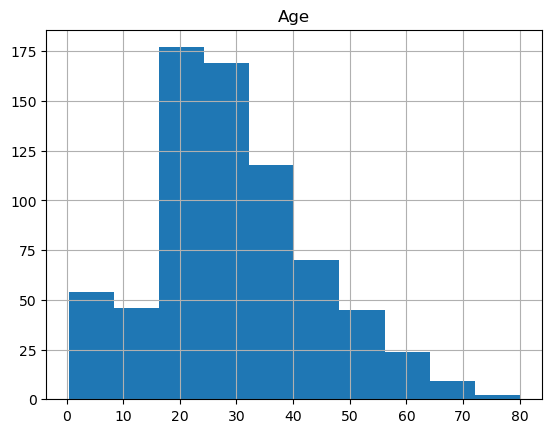

In [11]:
data.hist( column = ['Age'] )

Можно и так:

<Axes: >

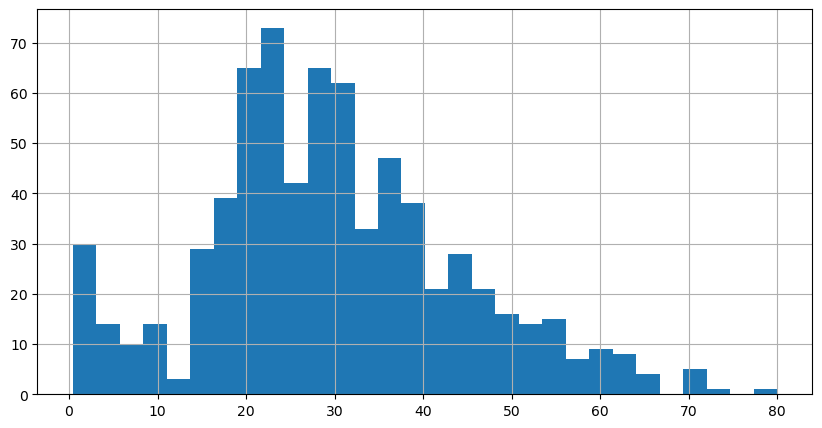

In [13]:
data['Age'].hist(bins = 30, figsize = (10, 5))

### Упражнение

Загрузите в датафрейм mountains содержимое файла Mountains.csv. Посчитайте следующие показатели:
1. Минимальную и максимальную высоту гор в этом наборе

2. В каком году было впервые покорено наибольшее количество вершин (столбец First ascent)?

3. Постройте распределение распределение First ascent по годам

In [28]:
df_mountains = pd.read_csv('./Homework/Mountains.csv', delimiter = ',')

df_mountains.head(3)

,Rank,Mountain,Height (m),Height (ft),Prominence (m),Range,Coordinates,Parent mountain,First ascent,Ascents bef. 2004,Failed attempts bef. 2004
0,1,Mount Everest / Sagarmatha / Chomolungma,8848,29029,8848,Mahalangur Himalaya,27°59′17″N 86°55′31″E﻿,NaN,1953,>>145,121.0
1,2,K2 / Qogir / Godwin Austen,8611,28251,4017,Baltoro Karakoram,35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44.0
2,3,Kangchenjunga,8586,28169,3922,Kangchenjunga Himalaya,27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24.0


In [27]:
df_mountains['Height (m)'].min()

7200

In [25]:
df_mountains['Height (m)'].max()

8848

In [41]:
# df_mountains.sort_values(by='Ascents bef. 2004', ascending=False).head(20)

In [48]:
df_mountains['First ascent'].value_counts().index[0]

'1960'

In [49]:
df_mountains['First ascent'].value_counts().head(1)


First ascent
1960    7
Name: count, dtype: int64

<Axes: >

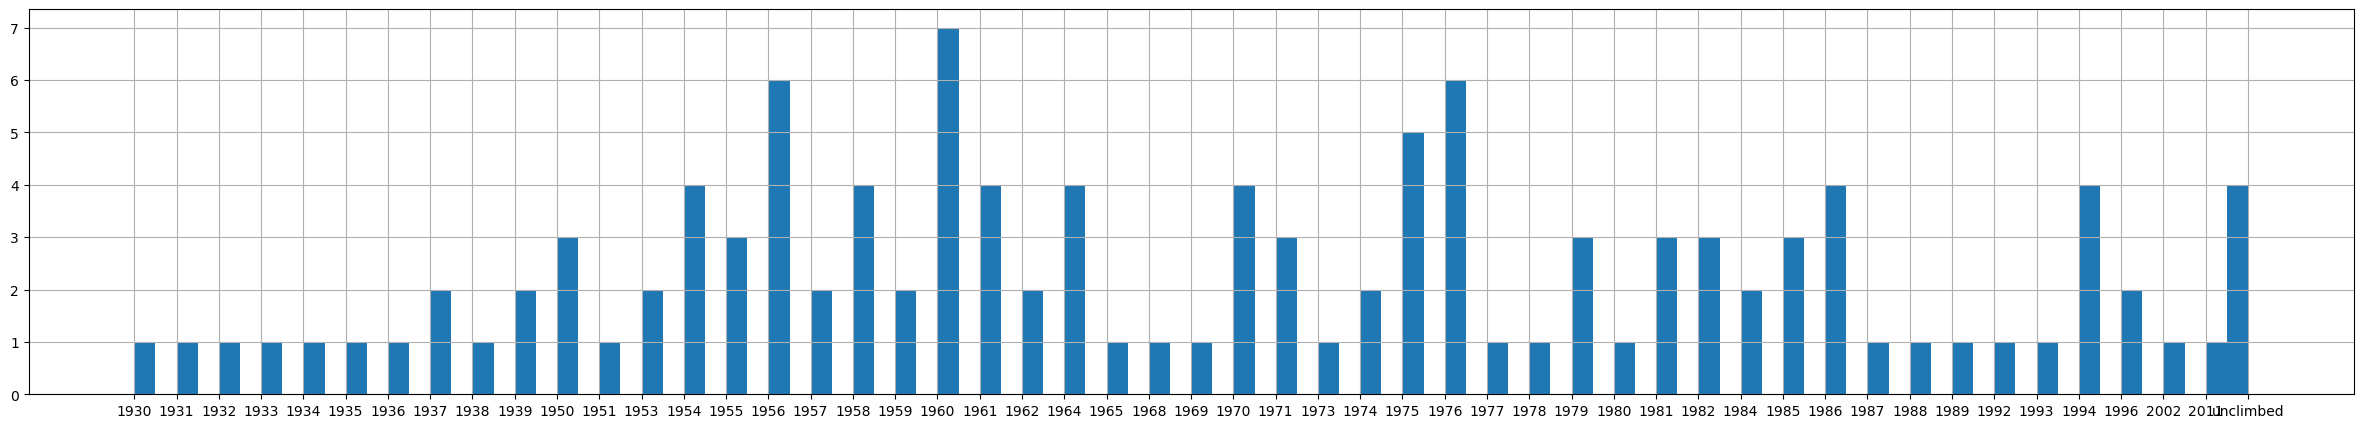

In [46]:
df_moun = df_mountains.sort_values(by='First ascent', ascending=True)
df_moun['First ascent'].hist(bins = 100, figsize = (30, 5))


### Поэлементные действия с DataFrame

In [ ]:
# зададим два DataFrame

df1 = pd.DataFrame( [ (0, 1), (2, 3), (4, 5) ], columns = [ 'value1', 'value2' ] )
df1

In [ ]:
df2 = pd.DataFrame( [ (10, 11), (12, 13), (14, 15), (17, 18) ], columns = [ 'value1', 'value3' ] )
df2

In [ ]:
# функция сложения
df1.add( df2 )

In [ ]:
# для несовпадающих строк используем значение из fill_value
df1.add( df2, fill_value = 100 ).fillna(0)

### mul - перемножение

In [ ]:
df1.mul( df2, fill_value = 0 )

### div - поэлементное деление DataFrame

In [ ]:
df1.div( df2, fill_value = 17 )

### Разность DataFrame

In [ ]:
df1.sub( df2 )

### Корректное копирование DataFrame

In [ ]:
# зададим DataFrame

df1 = pd.DataFrame( [ (0, 1) ], columns = [ 'value1', 'value2' ] )
df1

In [ ]:
# делаем его "копию"

df2 = df1

In [ ]:
# Изменяем значение ячейки в "копии"

df2['value1'][0] = 555

In [ ]:
df2

Смотрим что произошло с исходным

In [ ]:
df1

Сделаем "настоящую" копию

In [ ]:
df1 = pd.DataFrame( [ (0, 1) ], columns = [ 'value1', 'value2' ] )
df1

In [ ]:
df2 = df1.copy()

In [ ]:
df2['value1'][0] = 555

In [ ]:
df2

In [ ]:
df1

### Сводные таблицы

In [ ]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head()

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html
# index - значения столбца, которые будут в строках
# columns - значения столбца, которые образуют столбцы
# values - значения в ячейках таблицы
# aggfunc - функция, которая будет применена к значениям

# среднее значение столбца 'Age' в разбивке по Sex и Embarked
pd.pivot_table( data, index = ['Sex', 'Pclass'], columns = ['Embarked'], values = 'Age', aggfunc = np.mean )

### Apply - применить функцию в столбцу или строке

In [53]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
# data.head(20)

In [51]:
def ageGroup( row ):
    """
    Простая функция отнесения возраста к группе
    """
    
    # проверяем, что значение возраста не равно NaN
    if not pd.isnull( row['Age'] ):
        if row['Age'] <= 18:
            return 'Child'

        if row['Age'] >= 65:
            return 'Retiree'

        return 'Young'
    
    # если значение возраста NaN, то возвращаем Undef
    return 'Undef'

In [54]:
?ageGroup

In [66]:
# применим функцию ageGroup к DataFrame и выведем результат в отдельный столбец ageGroup

data['ageGroup'] = data.apply( ageGroup, axis = 1 )
data['ageGroup'].value_counts()

ageGroup
Young      564
Undef      177
Child      139
Retiree     11
Name: count, dtype: int64

In [69]:
# Фильтраця по значениям в определенном столбце
data[data['ageGroup'].isin(['Young'])].head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ageGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Young
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young


### Applymap - применяем функцию к каждой ячейке отдельно

In [55]:
# например, устанавливаем формат отображения

df = pd.DataFrame( np.random.randn( 10, 3 ), columns = ['first', 'second', 'third'] )
df

,first,second,third
0,-0.052993,-0.980194,-0.816579
1,-0.243080,0.250758,-0.162568
2,-2.076707,2.211730,-1.373823
3,-1.398817,-0.568688,0.684180
4,-0.164246,0.576261,-1.036937
5,-0.037041,-1.130007,-0.372816
6,0.517990,-0.929183,0.086948
7,-0.299988,-0.226596,-0.340674
8,0.514214,0.074165,-0.149829
9,0.964780,0.250574,-0.101265


In [56]:
df.apply( lambda x: x**2 )

,first,second,third
0,0.002808,0.960781,0.666801
1,0.059088,0.062880,0.026428
2,4.312712,4.891748,1.887391
3,1.956688,0.323406,0.468102
4,0.026977,0.332077,1.075239
5,0.001372,1.276915,0.138992
6,0.268314,0.863382,0.007560
7,0.089993,0.051346,0.116059
8,0.264416,0.005500,0.022449
9,0.930800,0.062787,0.010255


## Упражнение

Классифицируйте высоту гор и посчитайте распределение количества вершин по этой классификации:
* высота до 7500 метров - High
* до 8000 метров - Very high
* более 8000 метров - Extremely high

In [17]:
df_m = pd.read_csv('./Homework/Mountains.csv', delimiter = ',')

In [57]:
df_m.head(3)

,Rank,Mountain,Height (m),Height (ft),Prominence (m),Range,Coordinates,Parent mountain,First ascent,Ascents bef. 2004,Failed attempts bef. 2004
0,1,Mount Everest / Sagarmatha / Chomolungma,8848,29029,8848,Mahalangur Himalaya,27°59′17″N 86°55′31″E﻿,NaN,1953,>>145,121.0
1,2,K2 / Qogir / Godwin Austen,8611,28251,4017,Baltoro Karakoram,35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44.0
2,3,Kangchenjunga,8586,28169,3922,Kangchenjunga Himalaya,27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24.0


In [59]:
def height_rank(row):
    res = 'High'
    # проверяем, что значение возраста не равно NaN
    if not pd.isnull( row['Height (m)'] ):
        if row['Height (m)'] >= 7500 and row['Height (m)'] <= 8000:
            res = 'Very high'
        elif  row['Height (m)'] > 8000:
            res = 'Extremely high'
    return res

In [60]:
df_m['class'] = df_m.apply( height_rank, axis = 1 )

In [63]:
df_m['class'].value_counts().head(3)

class
High              64
Very high         40
Extremely high    14
Name: count, dtype: int64

<Axes: >

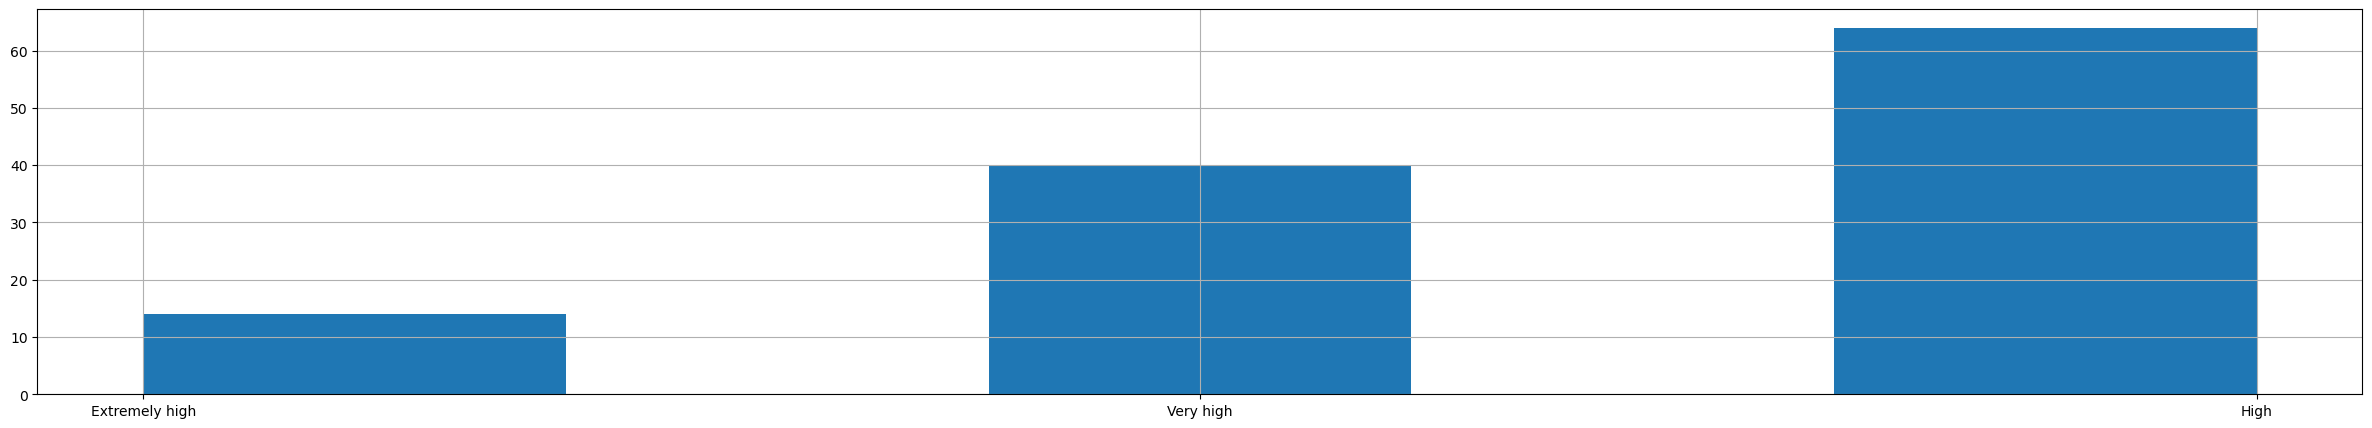

In [71]:
df_m['class'].hist(bins = 5, figsize = (30, 5))

### Сохранение DataFrame

In [ ]:
data.head()

In [ ]:
data.to_

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html
# разделитель sep по умолчанию запятая
# na_rep - что ставим на место пустых ячеек
# columns - какие столбцы хотим записать
# index - включать ли номер строки

data.to_csv( 'train_modified.csv', sep = ';', na_rep = '0', columns = ['Survived', 'ageGroup'], index = False )

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_json.html
# при сохранении в JSON может быть несколько вариантов группировки данных

# orient = index - строки имеют вид
# {"0":{"PassengerId":1,"Survived":0,"Pclass":3,"Name":"Braund, Mr. Owen Harris","Sex":"male","Age":22.0,"SibSp":1,"Parch":0,"Ticket":"A\/5 21171","Fare":7.25,"Cabin":null,"Embarked":"S","ageGroup":"Young"}

data.to_json( 'train_json_index.json', orient = 'index' )

In [ ]:
# другие варианты

data.to_json( 'train_json_columns.json', orient = 'columns' )
data.to_json( 'train_json_records.json', orient = 'records' )

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_excel.html
# сохранение в Excel

data.to_excel( 'train_modified.xlsx', sheet_name = 'data' )

### Типовые действия с DF

In [72]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
# data.head(3)

In [73]:
# выбрать все строки и подмножество столбцов

dataSelected = data.loc[:3, ['Name', 'Age', 'Cabin']]
dataSelected.head()

,Name,Age,Cabin
0,"Braund, Mr. Owen Harris",22.0,NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,C85
2,"Heikkinen, Miss. Laina",26.0,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,C123


In [74]:
# добавляем к фильтру строки
# например, с третьей до последней

dataSelected = data.loc[2:15, ['Name', 'Age', 'Cabin']]
dataSelected.head()

,Name,Age,Cabin
2,"Heikkinen, Miss. Laina",26.0,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,C123
4,"Allen, Mr. William Henry",35.0,NaN
5,"Moran, Mr. James",NaN,NaN
6,"McCarthy, Mr. Timothy J",54.0,E46


### Добавить столбцы

In [ ]:
# посчитаем количество слов в столбце Name
# сначала разбиваем на слова

data['nameLength'] = data['Name'].str.split(' ')
data.head()

In [ ]:
# добавляем подсчет количества слов

data['nameLength'] = data['Name'].str.split(' ').str.len()
data.head()

In [ ]:
# удаляем наши вычисления

del data['nameLength']
data.head()

In [ ]:
# переименование столбца
# параметр inplace указывает, что надо подставить новое значение в самом DataFrame data

data.rename( columns = { 'Name': 'FIO' }, inplace=True )
data.head()

In [ ]:
# можно заменить названия столбцов
# например, иногда русские названия в исходных данных доставляют трудности

data.columns = [ 'ID', 'Survived', 'Class', 'FIO', 'Gender', 'Age', 'SibSp', 'Parch', 'Ticker number', 'Fare', 'Cabin', 'Emnarked' ]
data.head()

### Действия со строками

In [ ]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head()

In [ ]:
# выбрать нужные строки
# например, со второй по пятую

data.loc[ 0:1 ]

In [ ]:
# выбор с набором значений
# строки с номерами 1, 2, 3 и 44

dataNew = data.iloc[ [1, 2, 3, 44] ]

In [ ]:
dataNew

In [ ]:
# индексы теперь идут не по порядку
# исправляем

dataNew.reset_index(inplace=True)

In [ ]:
dataNew

In [ ]:
del dataNew['index']

In [ ]:
dataNew

In [ ]:
# можно задать маску, по которой будут фильтроваться строки
# например, ID пассажира делится на 2

mask = ( data.PassengerId % 2 == 0 )

In [ ]:
mask[:5]

In [ ]:
data.loc[ mask ].head()

In [ ]:
data[ data.PassengerId % 2 == 0 ].head()

### Работа с пустыми значениями

In [ ]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head(10)

In [ ]:
# В столбце Age довольно много пустых значений
data.info()

In [ ]:
# посмотрим что это за строки

data.loc[ pd.isnull( data['Age'] ) ].head()

In [ ]:
# если надо исключить условие, то ставим тильду:

data.loc[ ~pd.isnull( data['Age'] ) ].head()

In [ ]:
# заменим пустые значения столбца Age на медиану

medianAge = data['Age'].median()
medianAge

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html

data['Age'].fillna( medianAge, inplace = True )

In [ ]:
# итак, значение для строки с индексом 5 (было NaN) заменено на среднее

data.head(10)

### Сортировка

In [ ]:
# сортировка по индексу
data.sort_index( ascending = False ).head()

In [ ]:
# сортировка по значениям
data.sort_values( by = 'Age', ascending = False ).head()

In [ ]:
# сортировка по значениям нескольких столбцов
data.sort_values( by = ['Sex', 'Age'], ascending = [True, False] ).head()

### Агрегация и группировка

In [ ]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head()

In [ ]:
# число непустых строк в DataFrame
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html

data.count()

In [ ]:
# для отдельного столбца

data['Age'].count()

In [ ]:
# сумма
data.sum()

In [ ]:
# среднее значение
data.mean()

In [ ]:
# комбинация функций
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.aggregate.html

data.aggregate( ['sum', 'mean'] )

In [ ]:
# агрегация по столбцам (agg - синоним aggregate)

data.agg( { 'Age': ['mean'], 'Survived': ['mean', 'sum'] } )

In [ ]:
# группировка по столбцу с вычислением среднего

data.groupby( 'Sex' ).mean().reset_index()

In [ ]:
# группировка по нескольким столбцам одновременно

data.groupby( ['Sex', 'Age'] ).mean()

### Объединение DataFrame

Merge - аналог JOIN в SQL

In [ ]:
# заведем два DataFrame

df1 = pd.DataFrame( {
    'key1': ['one', 'two', 'three', 'only1'],
    'value': [1, 2, 3, 4]
} )

In [ ]:
df1

In [ ]:
df2 = pd.DataFrame( {
    'key2': ['one', 'two', 'three', 'only2'],
    'value': [11, 12, 13, 14]
} )

In [ ]:
df2

In [ ]:
# сохраняем все значения ключей, которые есть в df1
# если нужно несколько столбцов, то пишем left_on = ['key1', ...] и right_on = ['key2', ...]

df1.merge( df2, how = 'left', left_on = 'key1', right_on = 'key2' )

In [ ]:
# сохраняем все значения ключей, которые есть в df2

df1.merge( df2, how = 'right', left_on = 'key1', right_on = 'key2' )

In [ ]:
# сохраняем все значения ключей (объединение)

df1.merge( df2, how = 'outer', left_on = 'key1', right_on = 'key2' )

In [ ]:
# сохраняем только общие значения ключей

df1.merge( df2, how = 'inner', left_on = 'key1', right_on = 'key2' )

Concat - совмещение DataFrame

In [ ]:
# объединение DataFrame путем обычного "склеивания"
pd.concat( [df1, df2] )

In [ ]:
# горизонтальное объединение
pd.concat( [df1, df2], axis = 1 )

Join - объединение по индексу

In [ ]:
df1 = pd.DataFrame( {
    'key1': ['one', 'two', 'three', 'only1'],
    'value': [1, 2, 3, 4]
    },
    index = ['0', '1', '2', '3'])

In [ ]:
df1

In [ ]:
df2 = pd.DataFrame( {
    'key2': ['one', 'two', 'three', 'only2'],
    'value': [11, 12, 13, 14]
    },
    index = ['2', '3', '4', '5'])

In [ ]:
df2

In [ ]:
# для join надо указать lsuffix и rsuffix

df1.join( df2, how = 'left', lsuffix = '_df1', rsuffix = '_df2' )